In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

In [20]:
# Reading the results file
from ema_workbench import load_results
file_name = 'refscenario_randompolicy_locations.tar.gz'
results = load_results(file_name)
# Extracting experiment and outcomes from results
experiments, outcomes = results

20 randomly generated policies with 100 scenarios

In [21]:
experiments

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,3.0,3.0,0.0,7.0,9.0,2.0,0.0,reference,10,dikesnet
1,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,6.0,8.0,6.0,1.0,7.0,2.0,3.0,reference,11,dikesnet
2,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,8.0,0.0,6.0,8.0,7.0,8.0,1.0,reference,12,dikesnet
3,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,10.0,2.0,9.0,9.0,9.0,1.0,3.0,reference,13,dikesnet
4,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,5.0,9.0,3.0,5.0,9.0,7.0,0.0,reference,14,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,4.0,7.0,3.0,1.0,5.0,10.0,4.0,reference,2005,dikesnet
1996,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,6.0,3.0,5.0,6.0,6.0,5.0,2.0,reference,2006,dikesnet
1997,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,2.0,9.0,0.0,10.0,8.0,5.0,0.0,reference,2007,dikesnet
1998,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,2.0,3.0,10.0,7.0,1.0,2.0,1.0,reference,2008,dikesnet


In [33]:
for col in experiments.columns:
    print(col)

discount rate 0
discount rate 1
discount rate 2
A.0_ID flood wave shape
A.1_Bmax
A.1_pfail
A.1_Brate
A.2_Bmax
A.2_pfail
A.2_Brate
A.3_Bmax
A.3_pfail
A.3_Brate
A.4_Bmax
A.4_pfail
A.4_Brate
A.5_Bmax
A.5_pfail
A.5_Brate
0_RfR 0
0_RfR 1
0_RfR 2
1_RfR 0
1_RfR 1
1_RfR 2
2_RfR 0
2_RfR 1
2_RfR 2
3_RfR 0
3_RfR 1
3_RfR 2
4_RfR 0
4_RfR 1
4_RfR 2
A.1_DikeIncrease 0
A.1_DikeIncrease 1
A.1_DikeIncrease 2
A.2_DikeIncrease 0
A.2_DikeIncrease 1
A.2_DikeIncrease 2
A.3_DikeIncrease 0
A.3_DikeIncrease 1
A.3_DikeIncrease 2
A.4_DikeIncrease 0
A.4_DikeIncrease 1
A.4_DikeIncrease 2
A.5_DikeIncrease 0
A.5_DikeIncrease 1
A.5_DikeIncrease 2
EWS_DaysToThreat
scenario
policy
model


In [34]:
cleaned_experiments = experiments.drop(experiments.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,-1,-2,-3]], axis = 1)

In [35]:
cleaned_experiments

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3.0,5.0,4.0,3.0,3.0,0.0,7.0,9.0,2.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,7.0,8.0,10.0,6.0,8.0,6.0,1.0,7.0,2.0,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,6.0,1.0,0.0,8.0,0.0,6.0,8.0,7.0,8.0,1.0
3,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,10.0,9.0,6.0,10.0,2.0,9.0,9.0,9.0,1.0,3.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,8.0,9.0,9.0,5.0,9.0,3.0,5.0,9.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,7.0,10.0,10.0,4.0,7.0,3.0,1.0,5.0,10.0,4.0
1996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,9.0,5.0,4.0,6.0,3.0,5.0,6.0,6.0,5.0,2.0
1997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,9.0,9.0,6.0,2.0,9.0,0.0,10.0,8.0,5.0,0.0
1998,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,3.0,6.0,9.0,2.0,3.0,10.0,7.0,1.0,2.0,1.0


In [36]:
outcomes

{'A.1 Total Costs': array([2.28015577e+08, 1.58578445e+08, 2.28194731e+08, ...,
        9.04623222e+07, 1.70633165e+08, 1.26248398e+08]),
 'A.1_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2 Total Costs': array([2.39018954e+08, 2.57777206e+08, 1.45546947e+08, ...,
        1.37740020e+08, 2.65985127e+08, 1.91944888e+08]),
 'A.2_Expected Number of Deaths': array([0.       , 0.       , 0.0003868, ..., 0.       , 0.       ,
        0.       ]),
 'A.3 Total Costs': array([9.05966638e+07, 1.54583588e+08, 5.62321051e+07, ...,
        1.53044874e+08, 1.13875046e+08, 1.18115748e+08]),
 'A.3_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.4 Total Costs': array([17803345.00019675, 52439755.92359457, 32576955.77263845, ...,
        26737343.80953755, 40486459.09188318, 34547104.91635189]),
 'A.4_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.5 Total Costs': array([1.58602309e+08, 1.23188593e+08, 1.86509593e+08, ...,
        1.93

In [37]:
df_outcomes = pd.DataFrame.from_dict(outcomes)

In [38]:
df_outcomes

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,2.280156e+08,0.0,2.390190e+08,0.000000,9.059666e+07,0.0,1.780335e+07,0.0,1.586023e+08,0.000000,1.172300e+09,0.000000
1,1.585784e+08,0.0,2.577772e+08,0.000000,1.545836e+08,0.0,5.243976e+07,0.0,1.231886e+08,0.002205,8.129000e+08,1254.385058
2,2.281947e+08,0.0,1.455469e+08,0.000387,5.623211e+07,0.0,3.257696e+07,0.0,1.865096e+08,0.000000,1.118400e+09,29.048597
3,7.222271e+07,0.0,6.243243e+07,0.002020,1.604929e+08,0.0,5.779895e+07,0.0,1.708230e+08,0.000000,1.420800e+09,968.951071
4,2.106273e+08,0.0,1.684670e+08,0.000000,1.623115e+08,0.0,4.606288e+07,0.0,1.702448e+08,0.000000,1.858100e+09,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.748603e+08,0.0,2.349043e+08,0.000037,1.684386e+08,0.0,3.824179e+07,0.0,1.341380e+08,0.000000,6.811000e+08,20.068884
1996,1.688259e+08,0.0,2.435072e+08,0.000000,1.218384e+08,0.0,3.790519e+07,0.0,1.444334e+08,0.000000,1.349900e+09,0.000000
1997,9.046232e+07,0.0,1.377400e+08,0.000000,1.530449e+08,0.0,2.673734e+07,0.0,1.931446e+08,0.000000,1.858100e+09,0.000000
1998,1.706332e+08,0.0,2.659851e+08,0.000000,1.138750e+08,0.0,4.048646e+07,0.0,1.119528e+08,0.000000,1.027900e+09,0.000000


In [39]:
from ema_workbench.analysis import prim

data = df_outcomes["A.3_Expected Number of Deaths"]

y = data <= np.percentile(data, 10)

prim_alg = prim.Prim(cleaned_experiments,y, threshold=0.8, peel_alpha=0.01)
box1 = prim_alg.find_box()

In [40]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.76872
density           1
id                4
mass         0.6365
mean              1
res_dim           1
Name: 4, dtype: object

                   box 4                                       
                     min   max                        qp values
A.3_DikeIncrease 0   3.5  10.0  [4.4938516051188504e-105, -1.0]



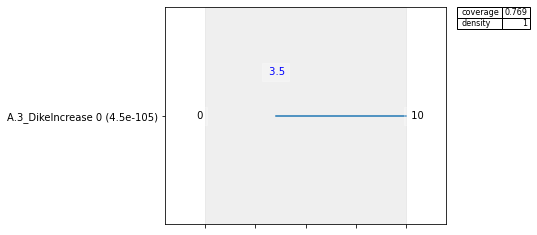

In [41]:
box1.inspect(4)
box1.inspect(4, style='graph')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

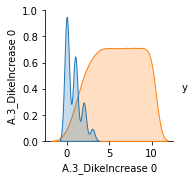

In [42]:
box1.select(2)
fig = box1.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

In [43]:
from ema_workbench.analysis import dimensional_stacking

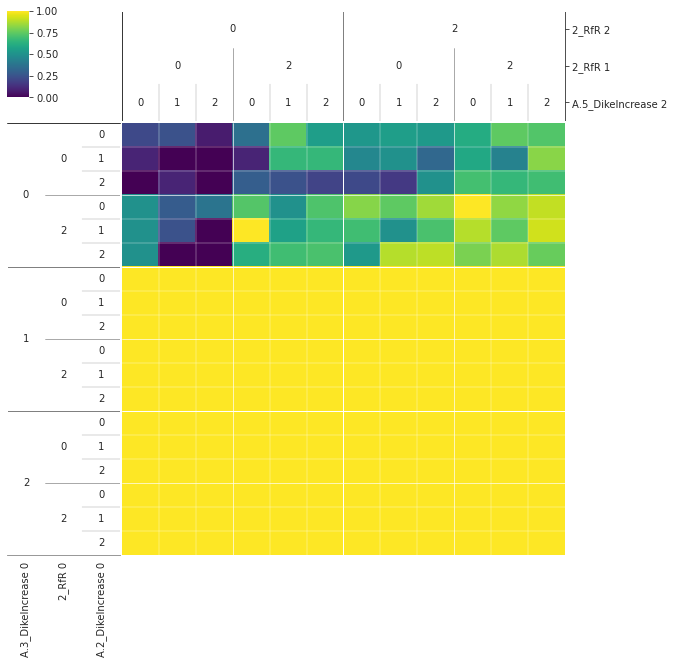

In [44]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y)
plt.show()

lots of empty spaces and thus we need more experiments

In [45]:
from ema_workbench.analysis import prim

data = df_outcomes["A.1 Total Costs"]

y2 = data <= np.percentile(data, 10)

prim_alg = prim.Prim(cleaned_experiments,y2, threshold=0.8, peel_alpha=0.05)
box2 = prim_alg.find_box()

In [46]:
box2.inspect_tradeoff()

alt.VConcatChart(...)

coverage        1
density     0.101
id              0
mass            1
mean        0.101
res_dim         0
Name: 0, dtype: object

Empty DataFrame
Columns: [(box 0, min), (box 0, max), (box 0, qp values)]
Index: []



D:\degen\anaconda\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:442: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  ax.set_ylim(top=-0.5, bottom=nr_unc - 0.5)


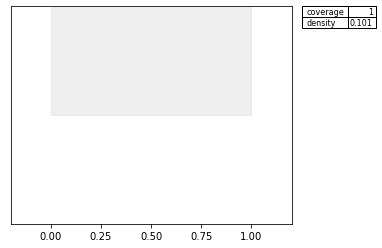

In [47]:
box2.inspect(0)
box2.inspect(0, style='graph')
plt.show()

In [48]:
box1.select(19)
fig = box2.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

IndexError: list index out of range

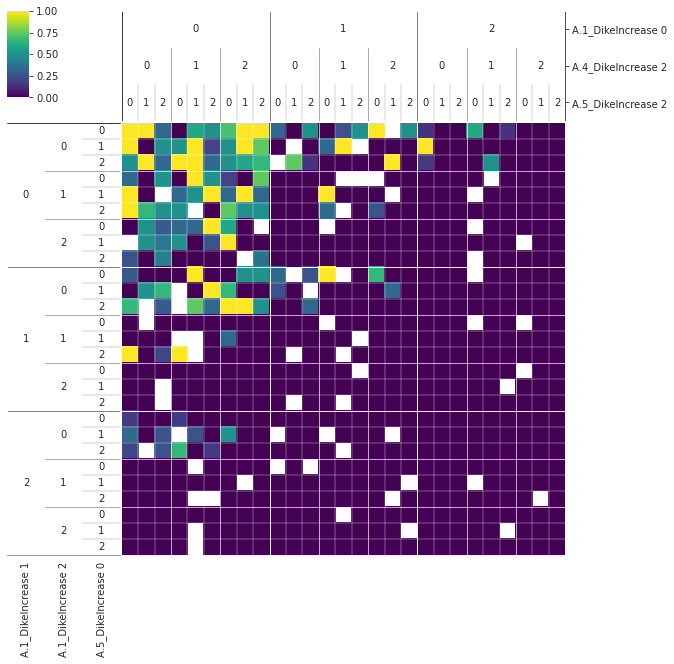

In [49]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y2)
plt.show()

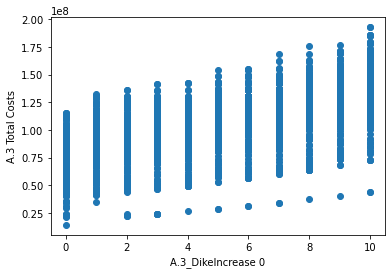

In [50]:
import matplotlib.pyplot as plt
plt.scatter(experiments["A.3_DikeIncrease 0"],df_outcomes["A.3 Total Costs"])
plt.ylabel('A.3 Total Costs')
plt.xlabel('A.3_DikeIncrease 0')
plt.show()

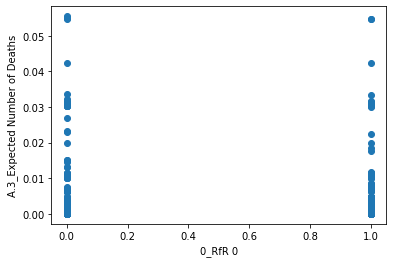

In [60]:
import matplotlib.pyplot as plt
plt.scatter(experiments["1_RfR 0"],df_outcomes["A.3_Expected Number of Deaths"])
plt.ylabel('A.3_Expected Number of Deaths')
plt.xlabel('0_RfR 0')
plt.show()

In [52]:
from ema_workbench.analysis import prim

data = df_outcomes["A.5_Expected Number of Deaths"]

y3 = data <= np.percentile(data, 10)

prim_alg = prim.Prim(cleaned_experiments,y3, threshold=0.8, peel_alpha=0.01)
box3 = prim_alg.find_box()

In [53]:
box3.inspect_tradeoff()

alt.VConcatChart(...)

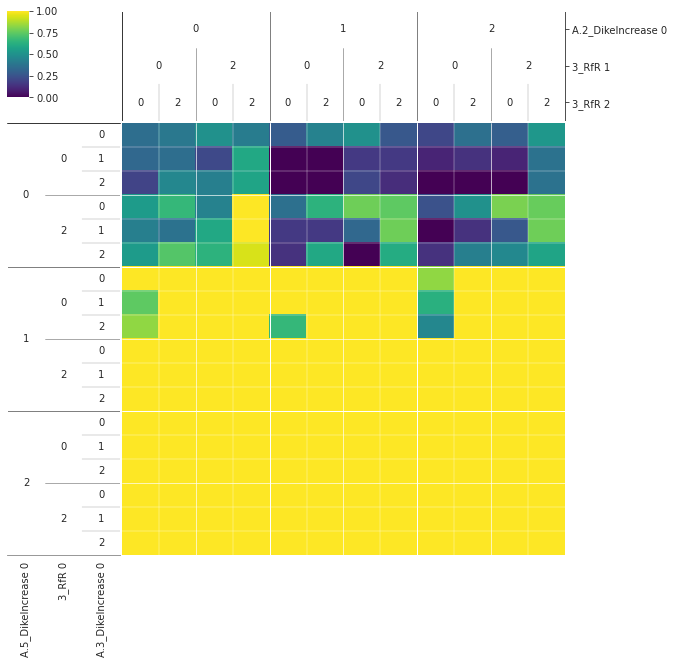

In [54]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y3)
plt.show()